In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

## Load the dataset
we load the German Credit dataset from the `data/` folder and display the first few rows to understand its structure.

In [3]:
df = pd.read_csv("../data/german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
# Basic information about the dataset
print(df.info())

# Summary statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [5]:
# Missing values count
print(df.isnull().sum())

# Distribution of the target variable
df['Risk'].value_counts(normalize=True)

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


Risk
good    0.7
bad     0.3
Name: proportion, dtype: float64

## Target Variable Distribution
we visualise the proportion of good vs bad credit risk to check for class imbalance.

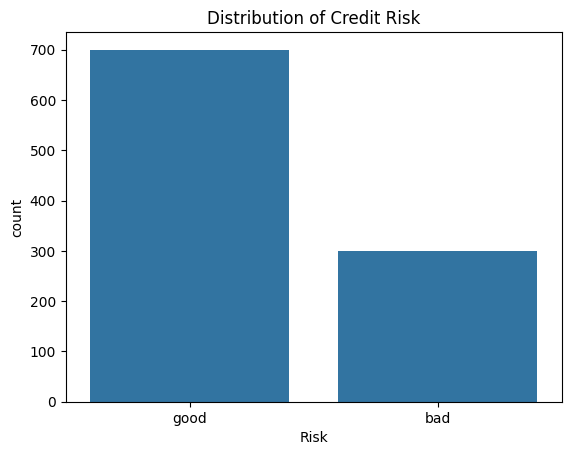

In [6]:
sns.countplot(x='Risk', data=df)
plt.title('Distribution of Credit Risk')
plt.show()

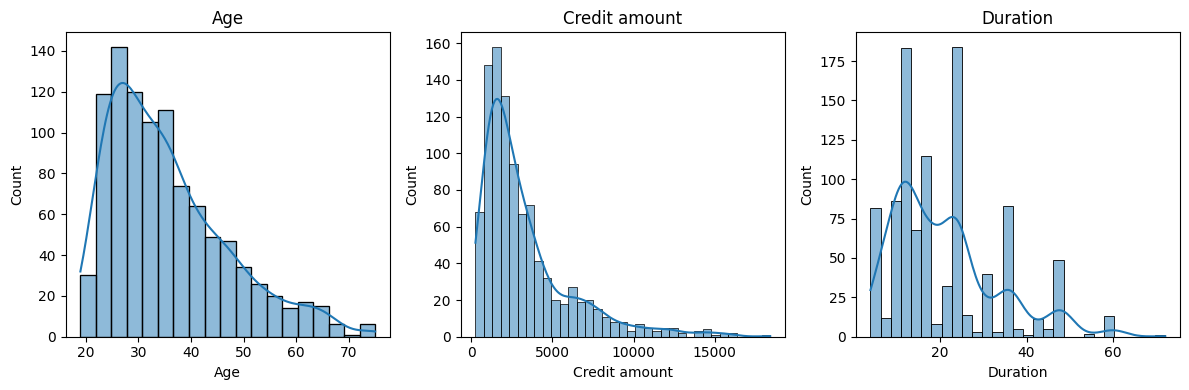

In [7]:
# Numerical feature distributions
numeric_features = ['Age', 'Credit amount', 'Duration']

plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_features,1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

## Credit amount distribution by Risk

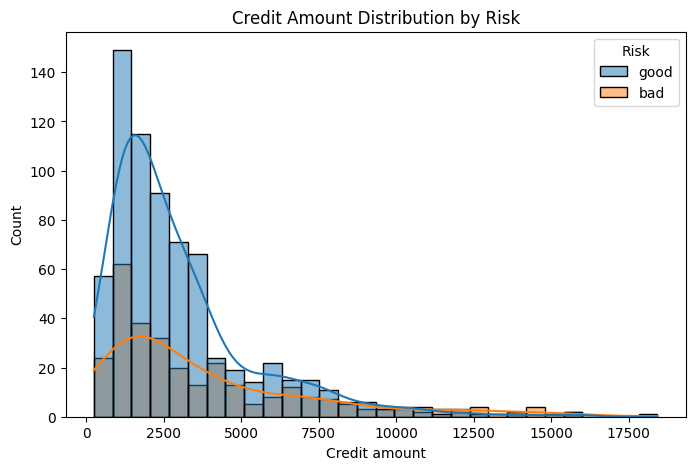

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Credit amount', hue='Risk', kde=True, bins=30)
plt.title('Credit Amount Distribution by Risk')
plt.show()

## Age Distribution by Risk

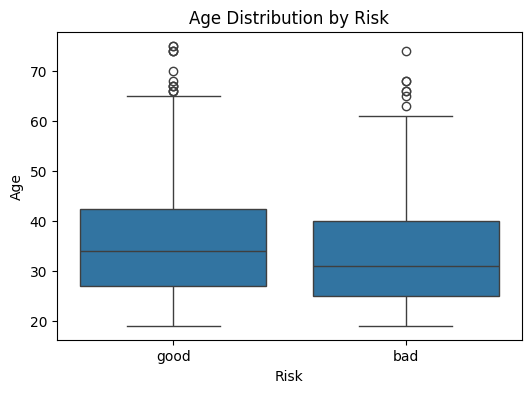

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Risk', y='Age')
plt.title('Age Distribution by Risk')
plt.show()

## Duration vs Risk

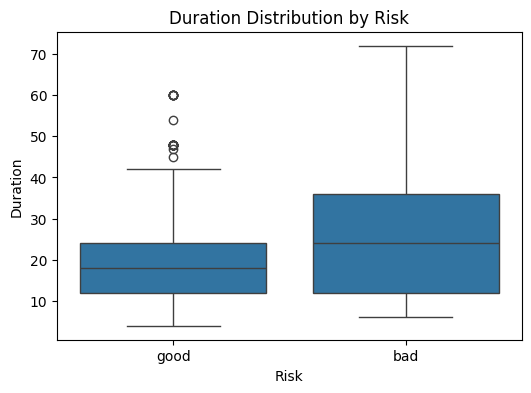

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Risk', y='Duration', data=df)
plt.title('Duration Distribution by Risk')
plt.show()

### Housing vs Risk
Checking how housing status influences the default risk.

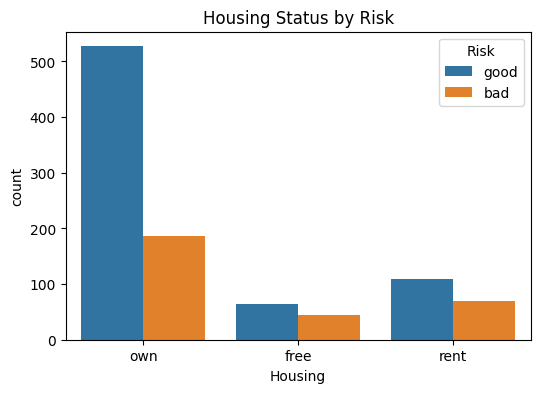

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Housing', hue='Risk')
plt.title('Housing Status by Risk')
plt.show()

### Purpose vs Risk

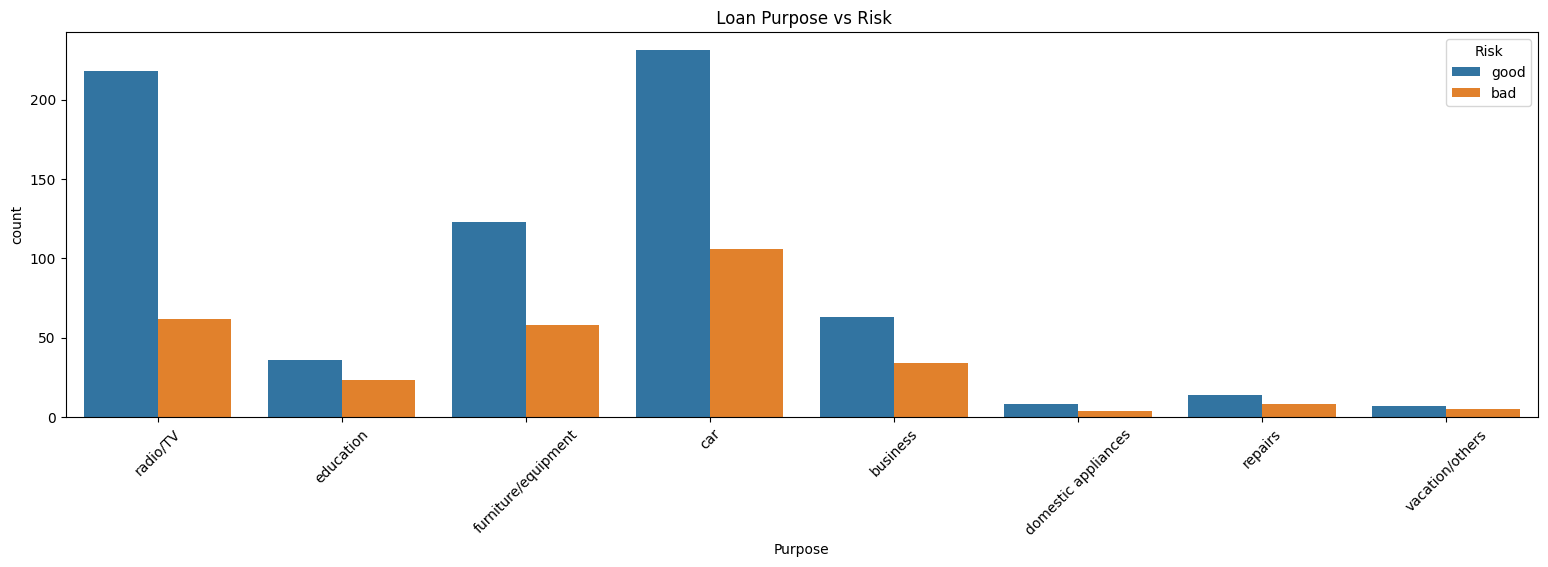

In [12]:
plt.figure(figsize=(19, 5))
sns.countplot(data=df, x='Purpose', hue='Risk')
plt.title(' Loan Purpose vs Risk')
plt.xticks(rotation=45)
plt.show()

### Savings accounts vs Risk

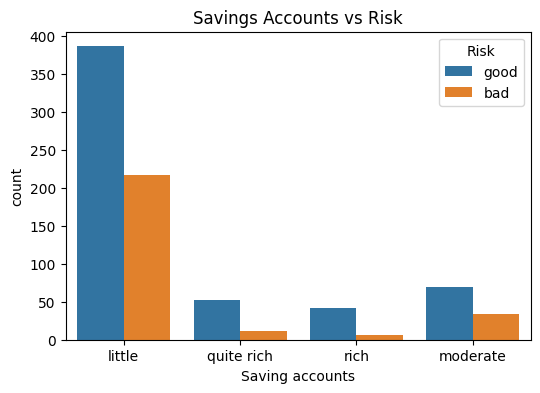

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Saving accounts", hue="Risk")
plt.title("Savings Accounts vs Risk")
plt.show()

### Checking account vs Risk

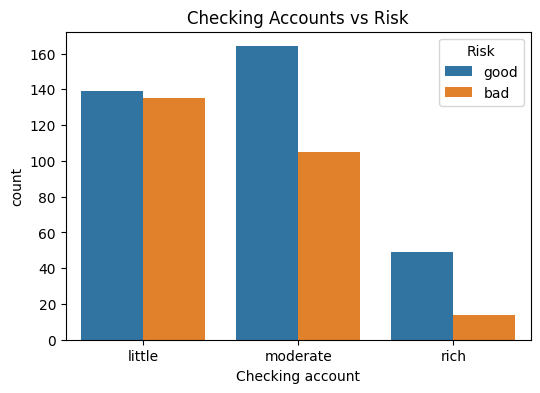

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Checking account', hue='Risk')
plt.title('Checking Accounts vs Risk')
plt.show()

## Data Cleaning and Preprocessing
### Handling Missing Values

In [15]:
df.isnull().sum()

df = df.fillna({'Saving accounts': 'unknown', 'Checking account': 'unknown'})

df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

### Encoding categorical Features
 

In [16]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
ordinal_cols = ['Saving accounts', 'Checking account']
le = LabelEncoder()
for col in ordinal_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

nominal_cols = ['Sex', 'Housing', 'Purpose']
                
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True)

#Verifying the encoding
df_encoded.head()



,Unnamed: 0,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,4,0,1169,6,good,True,True,False,False,False,False,False,True,False,False
1,1,22,2,0,1,5951,48,bad,False,True,False,False,False,False,False,True,False,False
2,2,49,1,0,3,2096,12,good,True,True,False,False,False,True,False,False,False,False
3,3,45,2,0,0,7882,42,good,True,False,False,False,False,False,True,False,False,False
4,4,53,2,0,0,4870,24,bad,True,False,False,True,False,False,False,False,False,False


In [17]:
#Encode target variable
df_encoded['Risk'] = df_encoded['Risk'].map({'good': 0, 'bad': 1})

# verifying the encoding of target variable
df_encoded['Risk'].value_counts()

Risk
0    700
1    300
Name: count, dtype: int64

### Feature Scaling

In [18]:
numeric_cols = ['Age', 'Credit amount', 'Duration']

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

#Verifying the scaling
df_encoded[numeric_cols].describe()



,Age,Credit amount,Duration
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.329071e-17,6.661338e-17,1.136868e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.455261e+00,-1.070865e+00,-1.402415e+00
25%,-7.516417e-01,-6.754833e-01,-7.386675e-01
50%,-2.239269e-01,-3.373443e-01,-2.408572e-01
75%,5.676451e-01,2.484620e-01,2.569531e-01
max,3.470076e+00,5.370789e+00,4.239436e+00


In [19]:
# verifying the dataset for modeling
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1000 non-null   int64  
 1   Age                          1000 non-null   float64
 2   Job                          1000 non-null   int64  
 3   Saving accounts              1000 non-null   int64  
 4   Checking account             1000 non-null   int64  
 5   Credit amount                1000 non-null   float64
 6   Duration                     1000 non-null   float64
 7   Risk                         1000 non-null   int64  
 8   Sex_male                     1000 non-null   bool   
 9   Housing_own                  1000 non-null   bool   
 10  Housing_rent                 1000 non-null   bool   
 11  Purpose_car                  1000 non-null   bool   
 12  Purpose_domestic appliances  1000 non-null   bool   
 13  Purpose_education  

## Train-Test Split we'll split our cleaned data into 80% training and 20% testing sets.

In [20]:
from sklearn.model_selection import train_test_split

# seperate features (X) and target variable (y)
X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#verify sizes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (800, 17)
X_test shape: (200, 17)


## Baseline Model: Logistic Regression model to establish a baseline accuracy for predicting credit risk.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and  train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.745

Confusion Matrix:
 [[125  15]
 [ 36  24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       140
           1       0.62      0.40      0.48        60

    accuracy                           0.74       200
   macro avg       0.70      0.65      0.66       200
weighted avg       0.73      0.74      0.73       200



### Random Forest Model 

We now train a "Random Forest Classifier" to capture non-linear relationships between the features and the target variable.
Unlike logistic Regresssion model, which assumes linear seperation, Random Forest builds Multiple decision trees and averages their results to improve accuracy and reduce overfitting.

We also set " class_weight = 'balanced'" to help the model handle the class imbalance (since "Good" customers are around 70% of data).
The model's performance will then be compared to the Logistic Regression baseline.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42,class_weight='balanced') # helps handle class imbalance
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.76

Confusion Matrix:
 [[127  13]
 [ 35  25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       140
           1       0.66      0.42      0.51        60

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.68       200
weighted avg       0.75      0.76      0.74       200



In [23]:
# Finding best parameters for random forest model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(4, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=40, cv=3, scoring='recall',verbose=1,n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best recall score: ", random_search.best_score_)

best_rf_model = random_search.best_estimator_

#evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best parameters found:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 220}
Best recall score:  0.6916666666666668
Accuracy: 0.71

Confusion Matrix:
 [[99 41]
 [17 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77       140
           1       0.51      0.72      0.60        60

    accuracy                           0.71       200
   macro avg       0.68      0.71      0.69       200
weighted avg       0.75      0.71      0.72       200



In [34]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights = {0: class_weights[0], 1: class_weights[1]}

rf_balanced = RandomForestClassifier(n_estimators=220,max_depth=4,min_samples_split=4,min_samples_leaf=1,max_features='sqrt', random_state=42, class_weight=weights)
rf_balanced.fit(X_train, y_train)
y_pred_balanced_rf = rf_balanced.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_balanced_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced_rf))

Accuracy: 0.7

Confusion Matrix:
 [[97 43]
 [17 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76       140
           1       0.50      0.72      0.59        60

    accuracy                           0.70       200
   macro avg       0.68      0.70      0.68       200
weighted avg       0.75      0.70      0.71       200



### XGBoost Model

XGBoost (Extreme Gradient Boosting) is one of the most popular and high-performing ensemble algorithms. 
It builds decision trees sequentially — each new tree tries to correct the errors of the previous ones. 
We also adjust `scale_pos_weight` to counter class imbalance. 
This model often provides a significant boost in performance compared to Random Forest.

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train XGBoost model
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4,random_state=42,scale_pos_weight=2, eval_metric='logloss')

#train the model
xgb_model.fit(X_train, y_train)

#predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.73

Confusion Matrix:
 [[111  29]
 [ 25  35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       140
           1       0.55      0.58      0.56        60

    accuracy                           0.73       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.74      0.73      0.73       200



### Handling Class Imbalance with SMOTE

The dataset has around 70% "Good" and 30% "Bad" customers, causing the model to miss many risky cases. 
To fix this, we apply **SMOTE (Synthetic Minority Oversampling Technique)**, which generates synthetic samples for the minority class instead of simply duplicating existing ones. 
This helps the model learn a more balanced decision boundary and improves recall on the minority class.


In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Seperate features and target variable again(in case needed)
X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']

# Apply SMOTE to balance the classes
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

print("Before SMOTE:",y.value_counts().to_dict())
print("After SMOTE:",y_resampled.value_counts().to_dict())

# Split the resampled data into training and testing sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Before SMOTE: {0: 700, 1: 300}
After SMOTE: {0: 700, 1: 700}


### Retraining on XGBoost model

In [26]:
xgb_model_sm = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4,random_state=42, eval_metric='logloss')
xgb_model_sm.fit(X_train_sm, y_train_sm)

y_pred_xgb_sm = xgb_model_sm.predict(X_test_sm)

print("Accuracy:", accuracy_score(y_test_sm, y_pred_xgb_sm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_sm, y_pred_xgb_sm))
print("\nClassification Report:\n", classification_report(y_test_sm, y_pred_xgb_sm))

Accuracy: 0.7928571428571428

Confusion Matrix:
 [[109  40]
 [ 18 113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79       149
           1       0.74      0.86      0.80       131

    accuracy                           0.79       280
   macro avg       0.80      0.80      0.79       280
weighted avg       0.80      0.79      0.79       280



In [27]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint, uniform

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

rand_param_dist = {
    'max_depth': randint(3, 7),
    'learning_rate': uniform(0.01, 0.09),
    'n_estimators': randint(80, 400),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rand_search = RandomizedSearchCV(estimator=xgb,
                                 param_distributions=rand_param_dist,
                                 n_iter=50, scoring='accuracy',
                                 cv=cv, verbose=1, n_jobs=-1, random_state=42)

# 1) tune on SMOTE training split
rand_search.fit(X_train_sm, y_train_sm)
print("Best Params (Randomized):", rand_search.best_params_)
print("Best CV Score (Randomized):", rand_search.best_score_)

best_xgb = rand_search.best_estimator_

# 2) evaluate on SMOTE test split (for debugging / comparison)
y_pred_sm_test = best_xgb.predict(X_test_sm)
print("\nSMOTE-test Accuracy:", accuracy_score(y_test_sm, y_pred_sm_test))
print("SMOTE-test Confusion Matrix:\n", confusion_matrix(y_test_sm, y_pred_sm_test))
print("SMOTE-test Classification Report:\n", classification_report(y_test_sm, y_pred_sm_test))

# 3) retrain best params on full SMOTE-resampled training data (X_resampled/y_resampled)
final_model = XGBClassifier(**rand_search.best_params_, eval_metric='logloss', random_state=42)
final_model.fit(X_resampled, y_resampled)

# 4) evaluate final model on the original untouched holdout (X_test, y_test) for realistic estimate
y_pred_holdout = final_model.predict(X_test)
print("\nHoldout Accuracy:", accuracy_score(y_test, y_pred_holdout))
print("Holdout Confusion Matrix:\n", confusion_matrix(y_test, y_pred_holdout))
print("Holdout Classification Report:\n", classification_report(y_test, y_pred_holdout))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Params (Randomized): {'colsample_bytree': np.float64(0.8249529843611099), 'learning_rate': np.float64(0.08949522330269814), 'max_depth': 6, 'n_estimators': 310, 'subsample': np.float64(0.9720485324637261)}
Best CV Score (Randomized): 0.8116012673653424

SMOTE-test Accuracy: 0.8178571428571428
SMOTE-test Confusion Matrix:
 [[115  34]
 [ 17 114]]
SMOTE-test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       149
           1       0.77      0.87      0.82       131

    accuracy                           0.82       280
   macro avg       0.82      0.82      0.82       280
weighted avg       0.82      0.82      0.82       280


Holdout Accuracy: 1.0
Holdout Confusion Matrix:
 [[140   0]
 [  0  60]]
Holdout Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
          

In [28]:
# Evaluate the tuned model on test data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_xgb_rand = rand_search.best_estimator_
y_pred_rand = best_xgb_rand.predict(X_test_sm)

print("Final Accuracy (Randomized best):", accuracy_score(y_test_sm, y_pred_rand))
print("\nFinal Confusion Matrix (Randomized best):\n", confusion_matrix(y_test_sm, y_pred_rand))
print("\nFinal Classification Report (Randomized best):\n", classification_report(y_test_sm, y_pred_rand))

Final Accuracy (Randomized best): 0.8178571428571428

Final Confusion Matrix (Randomized best):
 [[115  34]
 [ 17 114]]

Final Classification Report (Randomized best):
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       149
           1       0.77      0.87      0.82       131

    accuracy                           0.82       280
   macro avg       0.82      0.82      0.82       280
weighted avg       0.82      0.82      0.82       280



### Feature Importance Visualization.

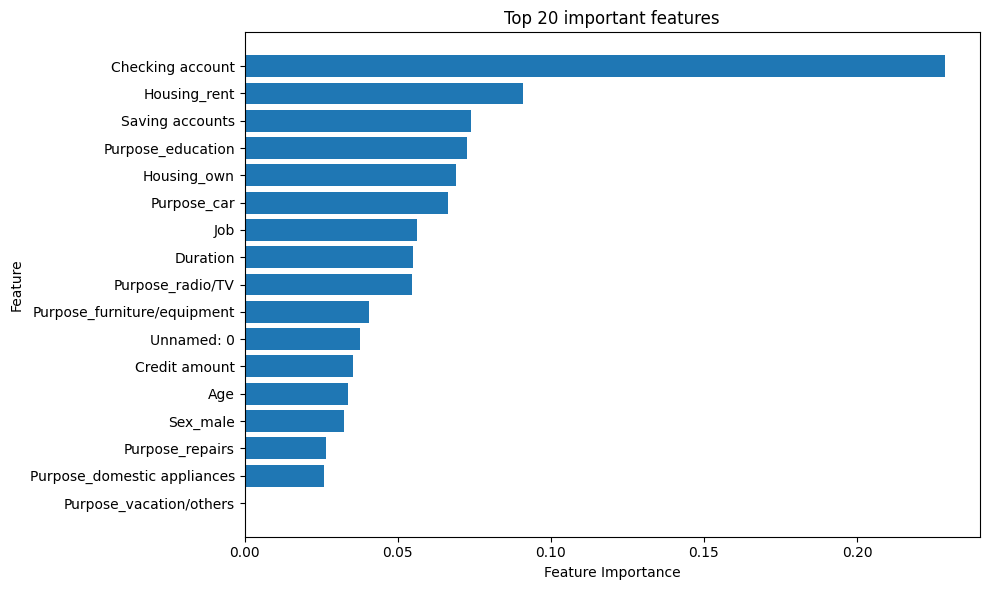

,Feature,Importance
4,Checking account,0.228679
9,Housing_rent,0.090961
3,Saving accounts,0.073804
12,Purpose_education,0.072748
8,Housing_own,0.069136
10,Purpose_car,0.066368
2,Job,0.056248
6,Duration,0.054875
14,Purpose_radio/TV,0.054580
13,Purpose_furniture/equipment,0.040499


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Get feature importances from the final model
importances = best_xgb_rand.feature_importances_

#Match importances to feature names
feature_names = X_train_sm.columns
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

#sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

#Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'][:20][::-1], feature_importances_df['Importance'][:20][::-1])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 important features')
plt.tight_layout()
plt.show()

#show top 10 features
feature_importances_df.head(10)

In [30]:
print(df_encoded.columns)

Index(['Unnamed: 0', 'Age', 'Job', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Risk', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')


### Feature Engineering and Retraining Pipeline

In [31]:
df_encoded['credit_per_month'] = df_encoded['Credit amount'] / df_encoded['Duration']

#Create age bins 
df_encoded['Age_bin'] = pd.cut(df_encoded['Age'], bins=[18,25, 35, 45, 55, 65, 100], labels=['18-25', '25-34', '35-44', '45-54', '55-64', '65+'])

#combine similar purpose categories
df_encoded['Purpose_combined'] = df_encoded['Purpose_education'] + df_encoded['Purpose_domestic appliances']

#RE-encode the new categorical feature
df_encoded = pd.get_dummies(df_encoded, columns=['Age_bin'], drop_first=True)

print("Feature Engineering completed. New shape:", df_encoded.shape)




Feature Engineering completed. New shape: (1000, 25)


In [32]:
#Train-test split after feature engineering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

#Define X and y
X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Calculate class weights
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

#use best parameters from randomized search
best_params = {
    "max_depth": 6,
    "learning_rate": 0.089,
    "n_estimators": 310,
    "subsample": 0.97,
    "colsample_bytree": 0.82
}

#Initialize XGBClassifier with best parameters and scale_pos_weight
best_xgb_final = XGBClassifier(**best_params, scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42)

#Train the model
best_xgb_final.fit(X_train, y_train)

#predictions
y_pred_final = best_xgb_final.predict(X_test)

#Evaluate
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nFinal Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nFinal Model Classification Report:\n", classification_report(y_test, y_pred_final))

Final Model Accuracy: 0.73

Final Model Confusion Matrix:
 [[114  26]
 [ 28  32]]

Final Model Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       140
           1       0.55      0.53      0.54        60

    accuracy                           0.73       200
   macro avg       0.68      0.67      0.68       200
weighted avg       0.73      0.73      0.73       200



## Model 1 — Weighted XGBoost (Hyperparameter Tuning on Original Data)

Here, we re-tune XGBoost on the original, imbalanced dataset using `scale_pos_weight`
to handle class imbalance instead of SMOTE. 
This ensures the model learns directly from real-world distributions.


In [33]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint, uniform

# Separate X and y again (using your encoded dataset)
X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Compute class weight for imbalance handling
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print("Scale pos weight:", scale_pos_weight)

# Define XGBoost and hyperparameter search space
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

param_dist = {
    'max_depth': randint(3, 8),
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(100, 400),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rand_search_weighted = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=40,
    scoring='accuracy',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model
rand_search_weighted.fit(X_train, y_train)

# Show best results
print("\nBest Params (Weighted):", rand_search_weighted.best_params_)
print("Best CV Score (Weighted):", rand_search_weighted.best_score_)

# Evaluate best model
best_xgb_weighted = rand_search_weighted.best_estimator_
y_pred_weighted = best_xgb_weighted.predict(X_test)

print("\nFinal Accuracy (Weighted best):", accuracy_score(y_test, y_pred_weighted))
print("\nFinal Confusion Matrix (Weighted best):\n", confusion_matrix(y_test, y_pred_weighted))
print("\nFinal Classification Report (Weighted best):\n", classification_report(y_test, y_pred_weighted))

Scale pos weight: 2.3333333333333335
Fitting 3 folds for each of 40 candidates, totalling 120 fits

Best Params (Weighted): {'colsample_bytree': np.float64(0.7049763486783568), 'learning_rate': np.float64(0.061209305829928104), 'max_depth': 5, 'n_estimators': 247, 'subsample': np.float64(0.8935518371228349)}
Best CV Score (Weighted): 0.7225038251058358

Final Accuracy (Weighted best): 0.75

Final Confusion Matrix (Weighted best):
 [[116  24]
 [ 26  34]]

Final Classification Report (Weighted best):
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       140
           1       0.59      0.57      0.58        60

    accuracy                           0.75       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.75      0.75      0.75       200

